# TikTok imports

In [ ]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import time
from tqdm.auto import tqdm

import requests
from datetime import datetime

In [ ]:
!pip install ensembledata
from ensembledata.api import EDClient

In [ ]:
# initialize the ensembledata client
client = EDClient("pZ3xwxCXeunUmT4F")

# get a free token at https://dashboard.ensembledata.com/register
# free trial of 50 units per day for 7 days, starting 23/11/24
#
# costs:
#  - 1 unit = 200 posts in full_hashtag_search :)
#  - 1 unit = 20 posts in hashtag_search
#  - 1 unit = 20 posts in keyword_search or full_keyword_search :(
#  - 1 unit = 30 comments to a post
#  - 1 unit = 30 replies to a comment
#
# documentation available at https://ensembledata.com/apis/docs#tag/Tiktok
# and https://github.com/EnsembleData/tiktok-scraper
# source code available at
# https://github.com/EnsembleData/ensembledata-python/tree/main/ensembledata/api

# Read posts from TikTok

Hashtag search (200 posts at the cost of 1 unit)

In [ ]:
# read posts related to an hashtag
result = client.tiktok.full_hashtag_search(
                hashtag = "hurricaneidalia", # hashtag name
                days = 550,   # ADJUST FOR HURRICANE DATE !!!!!!
                remap_output = True, # False for mobile app, True for web
                max_cursor = 4000) # max number of posts fetched,
                                  # cost is 1 unit per 200 posts

In [ ]:
# convert json to dataframe
df = pd.json_normalize(result.data["posts"])

In [ ]:
# extract relevant info
df = df[['itemInfos.id', 'itemInfos.createTime', 'itemInfos.authorId',
         'itemInfos.text', 'itemInfos.video.urls', 'itemInfos.shareCount',
         'itemInfos.playCount', 'itemInfos.commentCount']]

# rename columns
df.columns = ['id', 'createTime', 'authorId', 'text', 'video.urls',
              'shareCount', 'playCount', 'commentCount']

# format time to date in string format
df["createTime"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["createTime"]]

In [ ]:
display(df)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7272984075307076906,2023-08-30,7040188055365403654,#hurricane #Georgia #southgeorgia #hurricaneid...,[https://v45.tiktokcdn-eu.com/29cdffa8034a18f5...,4,163706,30
1,7272807541971651883,2023-08-29,6836479123327157254,Heres your 2PM live update from#stpetersburg o...,[https://v45.tiktokcdn-eu.com/ab9e345124e89e3f...,8,14344,9
2,7272464394393619717,2023-08-28,6766728749217432581,The price we pay to live in Paradise 🌴🌀 I hear...,[https://v45.tiktokcdn-eu.com/03d58bcb7010b49b...,111,262177,104
3,7273073779583028513,2023-08-30,6811620223419827205,Outer bands of Hurricane Idalia create a dark ...,[https://v45.tiktokcdn-eu.com/5848f541d763a42f...,1,1152,0
4,7272851405046648106,2023-08-29,6740818369945519110,"We are ready for #hurricaneidalia , 5pm here i...",[https://v45.tiktokcdn-eu.com/2b23064b51a4f442...,5,8579,19
...,...,...,...,...,...,...,...,...
3320,7272890989616860459,2023-08-29,6737395625463743493,Hurricane Idalia got nothing on us #kpop #newj...,[https://v77.tiktokcdn-eu.com/6e75737d7a769086...,2,1185,4
3321,7272881022587440430,2023-08-29,7072484101472699438,the disnsy local urge to go to the parks durin...,[https://v77.tiktokcdn-eu.com/4501f213e3d4cd26...,9,19854,7
3322,7272879943946734890,2023-08-29,7253190524081226794,Hurricane Idalia is coming… Miami getting some...,[https://v77.tiktokcdn-eu.com/72d10ad4115b684a...,24,10067,15
3323,7272878564758867243,2023-08-29,7078021791129535534,#hurricane #hurricaneidalia #floridacheck #flo...,[https://v77.tiktokcdn-eu.com/9d4cdbe5ea428d78...,1,952,31


In [ ]:
df_hashtag = df

In [ ]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7272984075307076906,2023-08-30,7040188055365403654,#hurricane #Georgia #southgeorgia #hurricaneid...,[https://v45.tiktokcdn-eu.com/29cdffa8034a18f5...,4,163706,30
1,7272807541971651883,2023-08-29,6836479123327157254,Heres your 2PM live update from#stpetersburg o...,[https://v45.tiktokcdn-eu.com/ab9e345124e89e3f...,8,14344,9
2,7272464394393619717,2023-08-28,6766728749217432581,The price we pay to live in Paradise 🌴🌀 I hear...,[https://v45.tiktokcdn-eu.com/03d58bcb7010b49b...,111,262177,104
3,7273073779583028513,2023-08-30,6811620223419827205,Outer bands of Hurricane Idalia create a dark ...,[https://v45.tiktokcdn-eu.com/5848f541d763a42f...,1,1152,0
4,7272851405046648106,2023-08-29,6740818369945519110,"We are ready for #hurricaneidalia , 5pm here i...",[https://v45.tiktokcdn-eu.com/2b23064b51a4f442...,5,8579,19
...,...,...,...,...,...,...,...,...
3320,7272890989616860459,2023-08-29,6737395625463743493,Hurricane Idalia got nothing on us #kpop #newj...,[https://v77.tiktokcdn-eu.com/6e75737d7a769086...,2,1185,4
3321,7272881022587440430,2023-08-29,7072484101472699438,the disnsy local urge to go to the parks durin...,[https://v77.tiktokcdn-eu.com/4501f213e3d4cd26...,9,19854,7
3322,7272879943946734890,2023-08-29,7253190524081226794,Hurricane Idalia is coming… Miami getting some...,[https://v77.tiktokcdn-eu.com/72d10ad4115b684a...,24,10067,15
3323,7272878564758867243,2023-08-29,7078021791129535534,#hurricane #hurricaneidalia #floridacheck #flo...,[https://v77.tiktokcdn-eu.com/9d4cdbe5ea428d78...,1,952,31


In [ ]:
for i in range(len(df_hashtag)):
  if df_hashtag["createTime"][i]<"2023-08-25":
    df_hashtag=df_hashtag.drop(i)
  if df_hashtag["createTime"][i]>"2023-10-09":
    df_hashtag=df_hashtag.drop(i)

In [ ]:
df_hashtag["createTime"].unique()

array(['2023-08-30', '2023-08-29', '2023-08-28', '2023-08-31',
       '2023-09-01', '2023-09-09', '2023-09-02', '2023-09-26',
       '2023-09-17', '2023-10-05', '2023-09-30', '2023-10-03',
       '2023-09-25', '2023-09-07', '2023-08-27', '2023-10-09',
       '2023-09-05', '2023-09-22', '2023-10-04', '2023-09-04',
       '2023-09-11', '2023-09-08', '2023-09-03', '2023-08-26',
       '2023-09-14', '2023-09-27', '2023-09-16', '2023-08-25',
       '2023-09-12', '2023-10-02', '2023-09-10', '2023-09-20',
       '2023-09-06', '2023-09-15', '2023-09-13', '2023-09-24',
       '2023-09-21', '2023-10-07', '2023-09-18'], dtype=object)

In [ ]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7272984075307076906,2023-08-30,7040188055365403654,#hurricane #Georgia #southgeorgia #hurricaneid...,[https://v45.tiktokcdn-eu.com/29cdffa8034a18f5...,4,163706,30
1,7272807541971651883,2023-08-29,6836479123327157254,Heres your 2PM live update from#stpetersburg o...,[https://v45.tiktokcdn-eu.com/ab9e345124e89e3f...,8,14344,9
2,7272464394393619717,2023-08-28,6766728749217432581,The price we pay to live in Paradise 🌴🌀 I hear...,[https://v45.tiktokcdn-eu.com/03d58bcb7010b49b...,111,262177,104
3,7273073779583028513,2023-08-30,6811620223419827205,Outer bands of Hurricane Idalia create a dark ...,[https://v45.tiktokcdn-eu.com/5848f541d763a42f...,1,1152,0
4,7272851405046648106,2023-08-29,6740818369945519110,"We are ready for #hurricaneidalia , 5pm here i...",[https://v45.tiktokcdn-eu.com/2b23064b51a4f442...,5,8579,19
...,...,...,...,...,...,...,...,...
3320,7272890989616860459,2023-08-29,6737395625463743493,Hurricane Idalia got nothing on us #kpop #newj...,[https://v77.tiktokcdn-eu.com/6e75737d7a769086...,2,1185,4
3321,7272881022587440430,2023-08-29,7072484101472699438,the disnsy local urge to go to the parks durin...,[https://v77.tiktokcdn-eu.com/4501f213e3d4cd26...,9,19854,7
3322,7272879943946734890,2023-08-29,7253190524081226794,Hurricane Idalia is coming… Miami getting some...,[https://v77.tiktokcdn-eu.com/72d10ad4115b684a...,24,10067,15
3323,7272878564758867243,2023-08-29,7078021791129535534,#hurricane #hurricaneidalia #floridacheck #flo...,[https://v77.tiktokcdn-eu.com/9d4cdbe5ea428d78...,1,952,31


## Save and download the csv file

In [ ]:
# save
df_hashtag.to_csv('idalia_posts1.csv', index=False)

In [ ]:

from google.colab import files

# Scarica il file
files.download('idalia_posts1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Read comments from TikTok

In [ ]:
df_hashtag = pd.read_csv('idalia_posts1.csv')

In [ ]:
df_hashtag

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7272984075307076906,2023-08-30,7040188055365403654,#hurricane #Georgia #southgeorgia #hurricaneid...,['https://v45.tiktokcdn-eu.com/29cdffa8034a18f...,4,163706,30
1,7272807541971651883,2023-08-29,6836479123327157254,Heres your 2PM live update from#stpetersburg o...,['https://v45.tiktokcdn-eu.com/ab9e345124e89e3...,8,14344,9
2,7272464394393619717,2023-08-28,6766728749217432581,The price we pay to live in Paradise 🌴🌀 I hear...,['https://v45.tiktokcdn-eu.com/03d58bcb7010b49...,111,262177,104
3,7273073779583028513,2023-08-30,6811620223419827205,Outer bands of Hurricane Idalia create a dark ...,['https://v45.tiktokcdn-eu.com/5848f541d763a42...,1,1152,0
4,7272851405046648106,2023-08-29,6740818369945519110,"We are ready for #hurricaneidalia , 5pm here i...",['https://v45.tiktokcdn-eu.com/2b23064b51a4f44...,5,8579,19
...,...,...,...,...,...,...,...,...
3277,7272890989616860459,2023-08-29,6737395625463743493,Hurricane Idalia got nothing on us #kpop #newj...,['https://v77.tiktokcdn-eu.com/6e75737d7a76908...,2,1185,4
3278,7272881022587440430,2023-08-29,7072484101472699438,the disnsy local urge to go to the parks durin...,['https://v77.tiktokcdn-eu.com/4501f213e3d4cd2...,9,19854,7
3279,7272879943946734890,2023-08-29,7253190524081226794,Hurricane Idalia is coming… Miami getting some...,['https://v77.tiktokcdn-eu.com/72d10ad4115b684...,24,10067,15
3280,7272878564758867243,2023-08-29,7078021791129535534,#hurricane #hurricaneidalia #floridacheck #flo...,['https://v77.tiktokcdn-eu.com/9d4cdbe5ea428d7...,1,952,31


In [ ]:
df_hashtag["createTime"].unique()

array(['2023-08-30', '2023-08-29', '2023-08-28', '2023-08-31',
       '2023-09-01', '2023-09-09', '2023-09-02', '2023-09-26',
       '2023-09-17', '2023-10-05', '2023-09-30', '2023-10-03',
       '2023-09-25', '2023-09-07', '2023-08-27', '2023-10-09',
       '2023-09-05', '2023-09-22', '2023-10-04', '2023-09-04',
       '2023-09-11', '2023-09-08', '2023-09-03', '2023-08-26',
       '2023-09-14', '2023-09-27', '2023-09-16', '2023-08-25',
       '2023-09-12', '2023-10-02', '2023-09-10', '2023-09-20',
       '2023-09-06', '2023-09-15', '2023-09-13', '2023-09-24',
       '2023-09-21', '2023-10-07', '2023-09-18'], dtype=object)

Comments search

In [ ]:
# order by comment count
df_hashtag = df_hashtag.sort_values(by=['commentCount'], ascending=False).reset_index(drop=True)

# delete posts with less than 30 comments
df_hashtag = df_hashtag[df_hashtag['commentCount']>=30]

# state how many
print(f'{len(df_hashtag)} posts for hashtags with more than 30 comments')


1082 posts for hashtags with more than 30 comments


In [ ]:
display(df_hashtag)

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7272071106490600747,2023-08-27,6966634939376157702,The arrogance and flippant attitude of some of...,['https://v45.tiktokcdn-eu.com/6e15684accb2c97...,7031,673424,5197
1,7273270653707390241,2023-08-31,7239587261129704454,"In seconds, the Idalia tsunami formed #idalia ...",['https://v45.tiktokcdn-eu.com/8855ac6906430dd...,19893,16468101,4096
2,7273191672803101994,2023-08-30,6610797907615940613,White House Press Secretary Karine Jean-Pierre...,['https://v45.tiktokcdn-eu.com/f8cf5a071033192...,590,504712,3964
3,7272535297378766123,2023-08-29,6790813865506636805,Please dont drain your pool! Praying for all m...,['https://v45.tiktokcdn-eu.com/b57e638fd955585...,11233,26980557,3796
4,7273179205133782278,2023-08-30,6949628184678204422,I really hope everyone would be fine #usa #hur...,['https://v45.tiktokcdn-eu.com/3bf2061d0ff8200...,186,473768,3648
...,...,...,...,...,...,...,...,...
1077,7272488042408004910,2023-08-28,7272100590468023339,hurricane tonight ‼️🌀😈 #hurricaneidalia #hurri...,['https://v45.tiktokcdn-eu.com/038ab924d366e38...,1,4943,30
1078,7274714447078362410,2023-09-03,6930012773955732486,All in all still grateful that we didn’t have ...,['https://v77.tiktokcdn-eu.com/4bed1a83eea5d50...,23,41696,30
1079,7272835923967085866,2023-08-29,6738446549145764869,Hurricane Idalia is set to hit Florida with a ...,['https://v77.tiktokcdn-eu.com/6fc785023a6d7fb...,65,37321,30
1080,7273103672937139499,2023-08-30,7223091337409856554,Replying to @maddie why is everyone so pressed...,['https://api16-normal-c-useast2a.tiktokv.com/...,5,18722,30


In [ ]:
len(df_hashtag['createTime'].unique())

31

In [ ]:
df_hashtag = df_hashtag.loc[df_hashtag.groupby('createTime')['commentCount'].idxmax()]

In [ ]:
# order df_hashtag by date
df_hashtag = df_hashtag.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

df_hashtag

,id,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7271280651700112682,2023-08-25,6782720514957067269,HIGH 70% probability of depression or storm #I...,['https://api16-normal-c-useast2a.tiktokv.com/...,389,59465,111
1,7271643255589080362,2023-08-26,6782720514957067269,#TropicalStormIdalia likely to form over the n...,['https://v16m.tiktokcdn-eu.com/d77100aedf528b...,1440,142843,286
2,7272071106490600747,2023-08-27,6966634939376157702,The arrogance and flippant attitude of some of...,['https://v45.tiktokcdn-eu.com/6e15684accb2c97...,7031,673424,5197
3,7272389824391269674,2023-08-28,6787453173931852805,#denisphillips #hurricaneidalia 🌀#jennysellsth...,['https://v77.tiktokcdn-eu.com/54f17e3b9d505d2...,1728,1301462,1931
4,7272535297378766123,2023-08-29,6790813865506636805,Please dont drain your pool! Praying for all m...,['https://v45.tiktokcdn-eu.com/b57e638fd955585...,11233,26980557,3796
5,7273191672803101994,2023-08-30,6610797907615940613,White House Press Secretary Karine Jean-Pierre...,['https://v45.tiktokcdn-eu.com/f8cf5a071033192...,590,504712,3964
6,7273270653707390241,2023-08-31,7239587261129704454,"In seconds, the Idalia tsunami formed #idalia ...",['https://v45.tiktokcdn-eu.com/8855ac6906430dd...,19893,16468101,4096
7,7274007768485367083,2023-09-01,6847548206487340038,The Florida governor rejected millions in clim...,['https://v77.tiktokcdn-eu.com/9cfe8963c481e27...,1486,113686,1105
8,7274314412536712494,2023-09-02,7160066902659302443,#potus #biden #rickscott #hurricaneidalia2023 ...,['https://api16-normal-c-useast2a.tiktokv.com/...,61,13951,248
9,7274413941835681070,2023-09-03,6808945376549962758,President Biden represents all Americans. He s...,['https://api16-normal-c-useast2a.tiktokv.com/...,59,52421,199


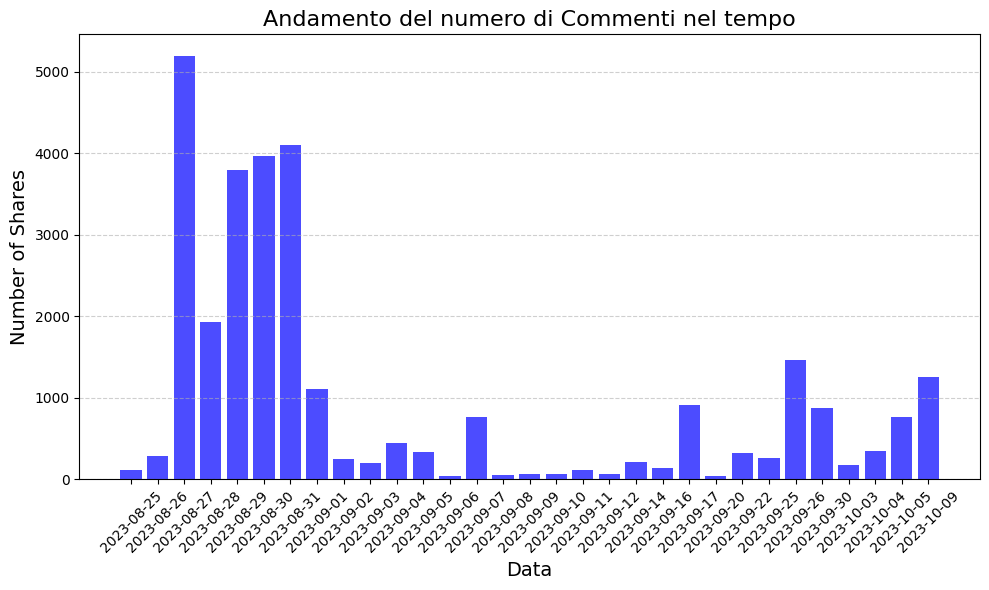

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_hashtag["createTime"], df_hashtag["commentCount"], color='b', alpha=0.7)

# Personalizzare il grafico
plt.title('Andamento del numero di Commenti nel tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Number of Shares', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Mostrare il grafico
plt.tight_layout()
plt.show()

In [ ]:
len(df_hashtag)

31

In [ ]:
# set search criteria
comments_to_retrieve = 30 # 30 is a safe number = 1 credit!

comments = list()
for i in range(len(df_hashtag)):
    aweme_id = df_hashtag["id"][i]
    cursor = None
    for _ in range(int(comments_to_retrieve/30)):
        result = client.tiktok.post_comments(
            aweme_id = aweme_id,
            cursor = cursor
        )
        comments.extend(result.data["comments"])
        cursor = result.data.get("nextCursor")
        if cursor is None:
            break

In [ ]:
# convert json to dataframe
df = pd.json_normalize(comments)

# extract relevant info
df = df[['aweme_id', 'cid', 'create_time', 'text', 'reply_comment_total']]

# format time to date in string format
df["create_time"] = [str(datetime.fromtimestamp(int(i)).date())
                                                for i in df["create_time"]]

# order by number of replies
df = df.sort_values(by=['reply_comment_total'], ascending=False).reset_index(drop=True)

# save
df_comments = df

In [ ]:
df_comments

,aweme_id,cid,create_time,text,reply_comment_total
0,7273191672803101994,7273236002486649643,2023-08-30,Can somebody remind me exactly how many days J...,214
1,7273191672803101994,7273223272096285486,2023-08-30,The second hand embarrassment for people that ...,153
2,7273191672803101994,7273230716459189035,2023-08-30,I'm not sure why they bother to allow Fox news...,115
3,7272535297378766123,7273252929049412395,2023-08-30,omg how do you have a pool right on the ocean?,114
4,7273191672803101994,7273273685847737130,2023-08-31,Didn’t he call the governor within about an ho...,102
...,...,...,...,...,...
650,7276160111658388782,7276230100265321262,2023-09-07,Gorgeous birds 💕,0
651,7276160111658388782,7276247450825573163,2023-09-08,Spent most of my life on the coast and I alway...,0
652,7276160111658388782,7276281566569005867,2023-09-08,Nope… it’s Jimmy 🤣Buffett’s version of a cardi...,0
653,7276160111658388782,7276199364618519301,2023-09-07,The flamingo is my country national bird Trini...,0


## Save and download comments file

In [ ]:
# save
df_comments.to_csv('idalia_comments1.csv', index=False)

from google.colab import files

# Scarica il file
files.download('idalia_comments1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>